### EDA

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
### loading datasets

df=pd.read_csv("ToyotaCorolla - MLR.csv")
df.head()

,Price,Age_08_04,KM,Fuel_Type,HP,Automatic,cc,Doors,Cylinders,Gears,Weight
0,13500,23,46986,Diesel,90,0,2000,3,4,5,1165
1,13750,23,72937,Diesel,90,0,2000,3,4,5,1165
2,13950,24,41711,Diesel,90,0,2000,3,4,5,1165
3,14950,26,48000,Diesel,90,0,2000,3,4,5,1165
4,13750,30,38500,Diesel,90,0,2000,3,4,5,1170


In [3]:
### finding how many rows and columns
df.shape

(1436, 11)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1436 entries, 0 to 1435
Data columns (total 11 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Price      1436 non-null   int64 
 1   Age_08_04  1436 non-null   int64 
 2   KM         1436 non-null   int64 
 3   Fuel_Type  1436 non-null   object
 4   HP         1436 non-null   int64 
 5   Automatic  1436 non-null   int64 
 6   cc         1436 non-null   int64 
 7   Doors      1436 non-null   int64 
 8   Cylinders  1436 non-null   int64 
 9   Gears      1436 non-null   int64 
 10  Weight     1436 non-null   int64 
dtypes: int64(10), object(1)
memory usage: 123.5+ KB


In [5]:
df.describe()

,Price,Age_08_04,KM,HP,Automatic,cc,Doors,Cylinders,Gears,Weight
count,1436.000000,1436.000000,1436.000000,1436.000000,1436.000000,1436.00000,1436.000000,1436.0,1436.000000,1436.00000
mean,10730.824513,55.947075,68533.259749,101.502089,0.055710,1576.85585,4.033426,4.0,5.026462,1072.45961
std,3626.964585,18.599988,37506.448872,14.981080,0.229441,424.38677,0.952677,0.0,0.188510,52.64112
min,4350.000000,1.000000,1.000000,69.000000,0.000000,1300.00000,2.000000,4.0,3.000000,1000.00000
25%,8450.000000,44.000000,43000.000000,90.000000,0.000000,1400.00000,3.000000,4.0,5.000000,1040.00000
50%,9900.000000,61.000000,63389.500000,110.000000,0.000000,1600.00000,4.000000,4.0,5.000000,1070.00000
75%,11950.000000,70.000000,87020.750000,110.000000,0.000000,1600.00000,5.000000,4.0,5.000000,1085.00000
max,32500.000000,80.000000,243000.000000,192.000000,1.000000,16000.00000,5.000000,4.0,6.000000,1615.00000


In [6]:
### finding null values

df.isnull().sum()

Price        0
Age_08_04    0
KM           0
Fuel_Type    0
HP           0
Automatic    0
cc           0
Doors        0
Cylinders    0
Gears        0
Weight       0
dtype: int64

In [7]:
### finding duplicate rows

df.duplicated().sum()

np.int64(1)

In [8]:
df.drop_duplicates(inplace=True)

In [9]:
df["Cylinders"].unique()

### dropping cylinder column because it is 

df.drop(columns="Cylinders",inplace=True)

<Axes: >

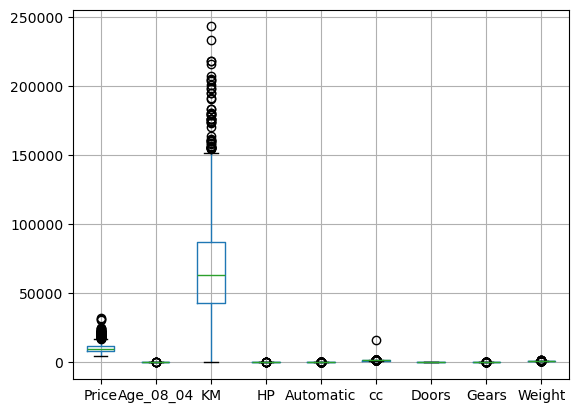

In [10]:
### Finding outliers

df.boxplot()

In [11]:
### code for removing outliers

def outlier_cappping(df,column):
    Q1= df[column].quantile(0.25)
    Q3= df[column].quantile(0.75)
    IQR= Q3-Q1
    lower_extreme= Q1-1.5*IQR
    upper_extreme= Q3+1.5*IQR
    df[column]=df[column].apply(lambda x: lower_extreme if x<lower_extreme else upper_extreme if x>upper_extreme else x)
for col in df.select_dtypes(['int','float']).columns:
    outlier_cappping(df,col)

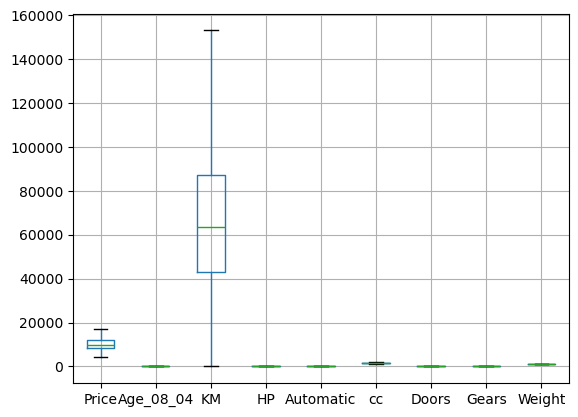

In [12]:
df.boxplot()
plt.show()

In [13]:
num_col=df.drop(columns="Fuel_Type")

In [14]:
corr=num_col.corr()
sns.heatmap(corr,annot=True)

<Axes: >

In [15]:
### Encoding Fuel_Type

In [16]:
df["Fuel_Type"].unique()

array(['Diesel', 'Petrol', 'CNG'], dtype=object)

In [17]:
df=pd.get_dummies(df,columns=["Fuel_Type"],drop_first=True)

In [18]:
df

,Price,Age_08_04,KM,HP,Automatic,cc,Doors,Gears,Weight,Fuel_Type_Diesel,Fuel_Type_Petrol
0,13500.0,23.0,46986.0,90.0,0.0,1900.0,3,5.0,1152.5,True,False
1,13750.0,23.0,72937.0,90.0,0.0,1900.0,3,5.0,1152.5,True,False
2,13950.0,24.0,41711.0,90.0,0.0,1900.0,3,5.0,1152.5,True,False
3,14950.0,26.0,48000.0,90.0,0.0,1900.0,3,5.0,1152.5,True,False
4,13750.0,30.0,38500.0,90.0,0.0,1900.0,3,5.0,1152.5,True,False
...,...,...,...,...,...,...,...,...,...,...,...
1431,7500.0,69.0,20544.0,86.0,0.0,1300.0,3,5.0,1025.0,False,True
1432,10845.0,72.0,19000.0,86.0,0.0,1300.0,3,5.0,1015.0,False,True
1433,8500.0,71.0,17016.0,86.0,0.0,1300.0,3,5.0,1015.0,False,True
1434,7250.0,70.0,16916.0,86.0,0.0,1300.0,3,5.0,1015.0,False,True


### Split the dataset into training and testing sets (e.g., 80% training, 20% testing)

In [19]:
from sklearn.model_selection import train_test_split

In [21]:
### splitting the dataset into feature and target

feature = df.drop(columns="Price")
target = df["Price"]

In [25]:
### splitting datasets into training and testing

x_train,x_test,y_train,y_test = train_test_split(feature,target,train_size=0.8,random_state=150)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(1148, 10)
(287, 10)
(1148,)
(287,)


### Build a multiple linear regression model using the training dataset. Interpret the coefficients of the model. Build a minimum of 3 different models.

In [26]:
### standard scaling for km,cc

from sklearn.preprocessing import StandardScaler

In [27]:
std_sca=StandardScaler()

In [29]:
x_train[["KM","cc"]]=std_sca.fit_transform(x_train[["KM","cc"]])

In [30]:
x_test[["KM","cc"]]=std_sca.fit_transform(x_test[["KM","cc"]])

In [36]:
y_train

1180     8250.0
279     14990.0
60      14950.0
268     14750.0
778      8950.0
         ...   
307     13500.0
497     10950.0
25      15950.0
443     11950.0
1253     6950.0
Name: Price, Length: 1148, dtype: float64

In [38]:
y_train = std_sca.fit_transform(y_train.values.reshape(-1, 1))

In [44]:
y_test = std_sca.fit_transform(y_test.values.reshape(-1, 1))

In [32]:
### Model Building

from sklearn.linear_model import LinearRegression

lin_model=LinearRegression()

In [39]:
lin_model.fit(x_train,y_train)

LinearRegression()

In [42]:
lin_model.coef_

array([[-3.55739528e-02, -1.83566006e-01,  8.55872042e-03,
         1.94289029e-16, -1.25403139e-01, -2.80060538e-02,
        -6.93889390e-18,  7.61520572e-03,  3.46001074e-01,
         3.68985282e-01]])

In [43]:
lin_model.intercept_

array([-7.25845824])

### Evaluate the performance of the model using appropriate evaluation metrics on the testing dataset.

In [46]:
from sklearn.metrics import r2_score,mean_absolute_error,mean_absolute_percentage_error,mean_squared_error

In [47]:
y_pred = lin_model.predict(x_test)
r2_score(y_test,y_pred)

0.8693739636609893

In [48]:
### mean_squared_error

mse=mean_squared_error(y_test,y_pred)
mse

0.1306260363390107

In [49]:
### root mean squares error

rmse=np.sqrt(mse)
rmse

np.float64(0.36142224106854676)

In [50]:
mae=mean_absolute_error(y_test,y_pred)
mae

0.28871067792427896

In [51]:
### mean_Absolute_percent_error
maoe=mean_absolute_percentage_error(y_test,y_pred)*100
maoe

105.85857630757884

### Apply Lasso and Ridge methods on the model.

In [52]:
from sklearn.linear_model import Lasso,Ridge,ElasticNet,LassoCV,RidgeCV,ElasticNetCV

In [53]:
lassocv=LassoCV(n_alphas=100,max_iter=1000,cv=5)
lassocv.fit(x_train,y_train)

/Applications/Anaconda/anaconda3/lib/python3.13/site-packages/sklearn/linear_model/_coordinate_descent.py:1664: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LassoCV(cv=5)

In [54]:
best_alpha=lassocv.alpha_
best_alpha

np.float64(0.019377053070741276)

In [55]:
lasso=Lasso(alpha=best_alpha,max_iter=1000)
lasso.fit(x_train,y_train)
y_pred=lasso.predict(x_test)
r2_score(y_test,y_pred)

0.8629375847479623

In [56]:
ridgecv=RidgeCV(alphas=(0.1,2,10,20,15,100),cv=5)
ridgecv.fit(x_train,y_train)

RidgeCV(alphas=(0.1, 2, 10, 20, 15, 100), cv=5)

In [57]:
ridge=Ridge(alpha=1,max_iter=1000)
ridge.fit(x_train,y_train)
y_pred=ridge.predict(x_test)
r2_score(y_test,y_pred)

0.8692011926059717

### Interview Question